<center> <H1> ✨ Projet NLP - TP4 avancé ✨ </H1></center>

___

<table style="width:100%; text-align:center;">
  <tr>
    <td>
      <strong style="font-size: 25px;">Davyd Bayard</strong><br>
      <a href="https://www.linkedin.com/in/davyd-bayard/">
        <img src="https://media.licdn.com/dms/image/D4E03AQGVOp1OztlUwA/profile-displayphoto-shrink_800_800/0/1677345039076?e=1712188800&v=beta&t=3yNosHZvNaGZTl1s4CdW_UH5N2dC7VaRkrwBOUPf7nk" alt="Davyd Bayard" width="200"/>
      </a>
    </td>
    <td>
      <strong style="font-size: 25px;">Guillaume Poirier</strong><br>
      <a href="https://www.linkedin.com/in/guillaume-poirier-41231713a/">
        <img src="https://media.licdn.com/dms/image/D4E03AQEyJMrFoKxchQ/profile-displayphoto-shrink_400_400/0/1664483713894?e=1708560000&v=beta&t=LFr2tMSek1mHi4kG6hRBWpHg3pUJuj_PpXjIA6Ks1Kw" alt="Guillaume Poirier" width="200"/>
      </a>
    </td>
  </tr>
</table>

___

<img src="https://t3.ftcdn.net/jpg/03/82/84/40/360_F_382844018_Ew4N9inbTNCylxO90v87oNHQKMzNrhsv.jpg" style="width: 100%; height: auto; display: block;"/>

___

## <span style="display:block;text-align:center;padding:15px;background-color:#00369c;color:#ffffff;border-radius:10px;font-size:150%;">Sommaire</span>

0. [Installation des packages et téléchargement des articles](#Requis)


1. [Récupération du flux RSS](#1)

2. [Question 2](#q2)

3. [Question 3](#q3)

4. [Question 4](#q4)

5. [Question 5](#q5)

7. [Question 7](#q7)

8. [Question 8](#q8)

9. [Question 9](#q9)

10. [Question 10](#q10)

11. [Question 11](#q11)

12. [Question 12](#q12)

13. [Question 13](#q13)

14. [Question 14](#q14)

15. [Question 15](#q15)

16. [Question 16](#q16)

## <a class="anchor" id="1"></a><b><span style='color:#8bb7cf'>1 |</span><span style='color:#00369c'> Classification de documents</span></b>  

In [4]:
import numpy as np
import json
import spacy
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm


# si besoin
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn.json
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst.json
# si besoin -- la première fois ou en cas de réinitialisation du notebook
!python -m spacy download en_core_web_md

--2024-02-14 09:23:44--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33542525 (32M) [application/json]
Saving to: ‘imdb-trn.json.1’

imdb-trn.json.1     100%[===================>]  31.99M  10.3MB/s    in 3.1s    

2024-02-14 09:23:48 (10.3 MB/s) - ‘imdb-trn.json.1’ saved [33542525/33542525]

--2024-02-14 09:23:48--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32759169 (31M) [application/json]
Saving to: ‘imdb-tst.json.1’

imdb-tst.json.1     100%[===================>]  31.24M  8.22MB/s    in 3.8s    

2024-02-14 09:23:52 (8.22 MB/s)

In [ ]:
#Ne pas oublier d'activer un accélérateur GPU

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_md")

# Fonction pour effectuer le pr
def process_data(text):
    doc = nlp(text, disable=["parser", "ner"])
    return doc

print("-----------------JEU ENTRAINEMENT-----------------")
# Charger les données d'apprentissage
jeu_entrainement = pd.read_json("http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn.json")
# jeu_entrainement = jeu_entrainement.iloc[:100]

# Paralléliser le traitement des données d'apprentissage
with Pool() as pool:
    jeu_entrainement['doc'] = zip(*tqdm(pool.imap(process_data, jeu_entrainement[1]), total=len(jeu_entrainement)))

# Afficher les premières lignes des données d'apprentissage avec les résultats de l'analyse morphosyntaxique
print(jeu_entrainement.head())

print("-----------------JEU TEST-----------------")
# Charger les données de test
jeu_test = pd.read_json("http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst.json")
# jeu_test = jeu_test.iloc[:100]
# Paralléliser le traitement des données de test
with Pool() as pool:
    jeu_test['doc'] = zip(*tqdm(pool.imap(process_data, jeu_test[1]), total=len(jeu_test)))

# Afficher les premières lignes des données de test avec les résultats de l'analyse morphosyntaxique
print(jeu_test.head())

-----------------JEU ENTRAINEMENT-----------------


  0%|          | 12/25000 [01:16<41:19:42,  5.95s/it]Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
  0%|          | 12/25000 [01:21<47:18:20,  6.82s/it]Traceback (most recent call last):

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 131, in worker
    put((job, i, result))
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 131, in worker
    put((job, i, result))
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 377, in put
    self._writer.send_bytes(obj)
  File "/usr/lib/python3.10/multi

In [ ]:
df_train.shape

(25000, 2)

In [ ]:
df_train[0].value_counts(dropna=False)

pos    12500
neg    12500
Name: 0, dtype: int64

Jeu d'apprentissage parfaitement equilibré donc pas de rééquilibrage à faire.

In [ ]:
df_test = pd.read_json("imdb-tst.json")
df_test.head()

,0,1
0,pos,"Based on an actual story, John Boorman shows t..."
1,pos,This is a gem. As a Film Four production - the...
2,pos,"I really like this show. It has drama, romance..."
3,pos,This is the best 3-D experience Disney has at ...
4,pos,"Of the Korean movies I've seen, only three had..."


In [ ]:
df_test.shape

(25000, 2)

In [ ]:
df_test[0].value_counts(dropna=False)

pos    12500
neg    12500
Name: 0, dtype: int64

Jeu d'apprentissage train aussi long que le jeu de test et jeu de test parfaitement équilibré aussi

In [ ]:
# 20% de l'ensemble de données
echantillon = df_train.sample(frac=0.2, random_state=42)

In [ ]:
echantillon.head()

,0,1
6868,pos,Great little thriller. I was expecting some ty...
24016,neg,"Nothing could have saved this movie, not even ..."
9668,pos,This was a good movie. It wasn't your typical ...
13640,neg,From the pen of Richard Condon (The Manchurian...
14018,neg,I suppose that today this film has relevance b...


In [ ]:
process = spacy.load('en_core_web_md')

In [ ]:
# Définir une fonction pour le traitement parallèle des documents
def process_docs(text):
    return process(text, disable=["parser", "ner"])

In [ ]:
# 20% de l'ensemble de données
echantillon['doc'] = echantillon.apply(lambda x : process_docs(x[1]), axis = 1)

In [ ]:
# A executer plus tard en entier
# # Appliquer le traitement parallèle sur les textes à l'aide de la méthode apply
# train_docs = df_train.apply(lambda x : process_docs(x["1"].iloc[:100]), axis = 1)

KeyError: '1'

In [ ]:
# A executer plus tard
# # Appliquer le traitement parallèle sur les textes à l'aide de la méthode apply
# test_docs = df_test.apply(lambda x : process_docs(x["1"].iloc[:100]), axis = 1)

A l'avenir, pour faire tourner le code, il vaut mieux le tester sur un echantillon car le temps d'execution est important.

Regroupement dans une colonne "doc" du processing.

In [ ]:
# A executer plus tard
# df_train['doc'] = train_docs
# df_test['doc'] = test_docs

In [ ]:
df_train.head()

,0,1,doc
0,pos,For a movie that gets no respect there sure ar...,"(For, a, movie, that, gets, no, respect, there..."
1,pos,Bizarre horror movie filled with famous faces ...,"(Bizarre, horror, movie, filled, with, famous,..."
2,pos,"A solid, if unremarkable film. Matthau, as Ein...","(A, solid, ,, if, unremarkable, film, ., Matth..."
3,pos,It's a strange feeling to sit alone in a theat...,"(It, 's, a, strange, feeling, to, sit, alone, ..."
4,pos,"You probably all already know this by now, but...","(You, probably, all, already, know, this, by, ..."


In [ ]:
print(train_doc[0])

For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


la ram explose
```python
def annot(doc) :
  annotations = []
  for token in doc:
      annotations.append({
          'pos': token.pos_,
          'lemma': token.lemma_,
      })

  return annotations
  ```

```python
# Créer un DataFrame à partir des annotations
df_train['annotations'] = df_train.apply(lambda x: annot(x['doc']),axis=1)
# Créer un DataFrame à partir des annotations
df_test['annotations'] = df_test.apply(lambda x: annot(x['doc']),axis=1)
```

Enregistrement en csv que l'on va enregistrer sur un drive et importer à chaque fois.  
Partie 1 : montage du drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Partie 2 : Definition des chemins complets

In [ ]:
path = '/content/drive/MyDrive/Projet NLP/TP avancé/'
chemin_csv_1 = path+"df_train.csv"
chemin_csv_2 = path+"df_test.csv"

Partie 3 : Enregistrement

In [ ]:
df_train.to_csv(chemin_csv_1,sep=";",index=False)
df_test.to_csv(chemin_csv_2,sep=";",index=False)

Partie 4 : Lecture

In [ ]:
df_train = pd.read_csv(chemin_csv_1,sep=";")
df_test = pd.read_csv(chemin_csv_2,sep=";")

# Fonctions pour représenter un document comme un vecteur moyen de plongement
## Préparation des données

- **version filtrée** : moyenne des plongements des tokens dont l'étiquette morphosyntaxique est dans une liste donnée (typiquement ('VERB', 'ADJ'))

- **configuration du reseau** : en fonction du sentiment général donné, il y a un configuration pour le reseau de neurone.
  - **problématique** : il s'agit d'un classification en deux catégories :
    - 'pos' pour les articles globalement positifs.
    - 'neg' pour les articles globalement negatifs.
  - **choix de la configuration** : il y aura deux neurones. Lorsque le sentiment est 'pos', le premier neurone doit être à zero et le second à un.
  Lorsque le sentiment est 'neg', le premier neurone doit être à un et le second à zero.

In [ ]:
# embedding dimension
dim = 300

# Init vocab
vocab = process.vocab

In [ ]:
# fonction qui prend en entrée un document et un sentiment.
# Elle renvoie deux listes :
# - l'embedding moyen des lemmes des tokens dont l'étiquette morpho-syntaxique
#   est dans la liste keep.
# - une configuration du reseau en fonction du sentiment.

def average_lemma_embeding_filter(sent, doc, keep = ('VERB', 'ADJ')):
  '''
  Fait la moyenne des plongements des tokens dans le doc retourné par spaCy. On suppose que l'on connaît
  la dimension des plongements (ici 300). On ne garde ici que les tokens pour lesquels token.pos_ apparaît
  dans la liste keep passée en argument (on enleve 'NOUN': ('VERB', 'ADJ'))
  '''
  global vocab
  global dim
  sum = np.zeros(dim, dtype='float32')

  n = 0
  for tok in doc:
    if keep != None and tok.pos_ not in keep: continue # on ne regarde pas ces tokens

    lemma = tok.lemma_

    # on vérifie que le lemme a bien un embeddig associé : si oui, on l'ajoute à sum
    if vocab[lemma].has_vector:
      sum += vocab[lemma].vector
      n += 1

  if n != 0:
    sum  = sum / np.float32(n)

  if sent == "pos" :
    neuronal_conf = np.array([0, 1])
  elif sent == "neg" :
    neuronal_conf = np.array([1, 0])

  return sum,neuronal_conf

Test de la fonction sur le premier document, et le premier sentiment

In [ ]:
df_train["doc"].iloc[0]

For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.

In [ ]:
df_train["0"].iloc[0]

'pos'

In [ ]:
df_train["doc"].dtype

dtype('O')

In [ ]:
average_lemma_embeding_filter(df_train["0"].iloc[0],df_train["doc"].iloc[0])

NameError: name 'ech' is not defined

Création du dataset

**ancienne version trop couteuse en temps et inefficace** :
```python
# number of documents
nsamples = df_train.shape[0]

#
data_label_dict = {}

for index, row in df_train.iterrows():
    key, value = average_lemma_embeding_filter(row[0], row["doc"])
    key_as_list = key.tolist()  # Convertir le tableau NumPy en une liste
    data_label_dict[tuple(key_as_list)] = value  # Utiliser la liste convertie comme clé
```
La nouvelle version utilise apply sur un dataframe pour vectoriser et eviter une boucle for.  
D'abord création d'un dataframe avec label et data.  

```python

# Convertir les colonnes "data" et "label" en tenseurs TensorFlow
data_tensor_trn = tf.convert_to_tensor(df_train_data_label["data"].tolist(), dtype=tf.float32)
label_tensor_trn = tf.convert_to_tensor(df_train_data_label["label"].tolist(), dtype=tf.int8)

ds_train = tf.data.Dataset.from_tensor_slices((data_tensor_trn, label_tensor_trn))

print(ds_train)
print(ds_train.element_spec)

print(ds_train.cardinality().numpy())
for item in ds_train.take(1):
  print(item)

# Même chose pour test
```
c'est hyper chiant à manipuler je vais utiliser des dataframe

In [ ]:
df_train_data_label = pd.DataFrame(df_train.apply(lambda x: average_lemma_embeding_filter(x[0], x["doc"]), axis=1).tolist(), columns=['data', 'label'])

In [ ]:
df_test_data_label = pd.DataFrame(df_test.apply(lambda x: average_lemma_embeding_filter(x[0], x["doc"]), axis=1).tolist(), columns=['data', 'label'])

In [ ]:
df_ech_data_label = pd.DataFrame(echantillon.apply(lambda x: average_lemma_embeding_filter(x[0], x["doc"]), axis=1).tolist(), columns=['data', 'label'])

In [ ]:
data, label = average_lemma_embeding_filter(echantillon[0].iloc[0],echantillon["doc"].iloc[0])

In [ ]:
data

array([ 3.5850558e-02,  1.4385430e+00, -1.5343560e+00, -3.3120757e-01,
        1.0057145e+00,  1.0423162e+00,  1.3864995e+00,  3.5822847e+00,
       -2.5060532e+00,  2.9560745e-01,  4.1740251e+00,  2.3925338e+00,
       -3.8546965e+00,  1.9947970e+00,  2.8670731e+00,  4.3321344e-01,
        1.8643612e+00, -1.9937661e+00, -7.0030778e-04, -2.6442128e-01,
        3.1755799e-01, -1.8610613e-01, -4.6230882e-01, -2.1473854e+00,
       -3.3174872e-01, -8.8836652e-01, -2.5331199e+00, -6.0888177e-01,
        3.9600018e-01,  2.6312015e+00,  2.0186174e+00, -1.5972481e+00,
       -4.9775830e-01, -2.0158815e+00,  8.4581539e-02, -1.7361060e+00,
       -4.3940064e-01,  1.1563321e+00,  3.4121261e+00,  1.5228599e+00,
       -1.2075870e+00,  7.3854560e-01,  1.5637432e+00, -7.7772135e-01,
       -1.3221724e+00,  1.2392973e+00,  2.1145003e+00, -3.5445194e+00,
       -1.3948084e+00,  1.2552592e+00,  4.6803665e-01,  1.8436316e+00,
        3.5787204e-01, -3.0111842e+00, -2.1728826e+00,  8.3931261e-01,
      

In [ ]:
data.shape

(300,)

In [ ]:
path = '/content/drive/MyDrive/Projet NLP/TP avancé/'
chemin_csv_3 = path+"ech.csv"

In [ ]:
df_ech_data_label.to_csv(chemin_csv_3,sep=";",index=False)

In [ ]:
df_ech_data_label_tst = pd.read_csv(chemin_csv_3,sep=";")

In [ ]:
df_ech_data_label_tst.head()

,data,label
0,[ 3.5850558e-02 1.4385430e+00 -1.5343560e+00 ...,[0 1]
1,[-1.60061270e-01 1.38050005e-01 -2.26191950e+...,[1 0]
2,[-9.61355031e-01 4.96522576e-01 -1.39844906e+...,[0 1]
3,[-0.15831351 0.86204153 -1.1513499 0.382904...,[1 0]
4,[-9.89478350e-01 8.83454442e-01 -1.47232592e+...,[1 0]


In [ ]:
df_ech_data_label_tst.head()

,data,label
0,[ 3.5850558e-02 1.4385430e+00 -1.5343560e+00 ...,[0 1]
1,[-1.60061270e-01 1.38050005e-01 -2.26191950e+...,[1 0]
2,[-9.61355031e-01 4.96522576e-01 -1.39844906e+...,[0 1]
3,[-0.15831351 0.86204153 -1.1513499 0.382904...,[1 0]
4,[-9.89478350e-01 8.83454442e-01 -1.47232592e+...,[1 0]


In [ ]:
datas = []
labels = []

for i in range(df_ech_data_label_tst.shape[0]):
  data, label = average_lemma_embeding_filter(df_ech_data_label_tst[0].iloc[i],df_ech_data_label_tst["doc"].iloc[i])
  datas.append(data)
  labels.append(label)

KeyError: 0

In [ ]:
from sklearn.model_selection import train_test_split

# Supposons que df_train contient vos données d'entraînement
# X représente les caractéristiques et y représente les étiquettes
data = df_ech_data_label.drop(columns=['label'])
label = df_ech_data_label['label']

# Diviser les données en ensembles d'entraînement et de validation
data_train, data_val, label_train, label_val = train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de validation
data_train, data_val, label_train, label_val = train_test_split(datas, labels, test_size=0.2, random_state=42)

NameError: name 'datas' is not defined

In [ ]:
label_train.head()

4227    [1, 0]
4676    [0, 1]
800     [1, 0]
3671    [1, 0]
4193    [0, 1]
Name: label, dtype: object

In [ ]:
label_val.shape

(1000,)

In [ ]:
data_train.shape

(4000, 1)

In [ ]:
data_train.head()

,data
4227,"[-0.17141816, 0.7990397, -2.1363735, -1.082333..."
4676,"[-0.33971286, 0.56027544, -1.9931976, -0.69786..."
800,"[-0.65211356, 0.7205532, -1.5824344, -1.128867..."
3671,"[0.72620314, 1.366161, -2.139722, -0.5915403, ..."
4193,"[-0.05651238, 1.812249, -1.9711034, -0.5208373..."


In [ ]:
data_train.iloc[0]

data    [-0.17141816, 0.7990397, -2.1363735, -1.082333...
Name: 4227, dtype: object

In [ ]:
len(data_train.iloc[0])

1

In [ ]:
x_train = np.array(data_train,dtype='float32')
x_val = np.array(data_val,dtype='float32')

y_train = np.array(label_train)
y_val = np.array(label_val)

In [ ]:
arrays = data_train.apply(lambda x: x['data'].tolist(),axis = 1)

In [ ]:
arrays.shape

(4000,)

In [ ]:
arrays.iloc[0]

[-0.17141816020011902,
 0.7990397214889526,
 -2.136373519897461,
 -1.0823332071304321,
 0.522442102432251,
 1.4790219068527222,
 1.504530668258667,
 3.4599077701568604,
 -2.7247345447540283,
 0.8941218256950378,
 3.428365468978882,
 1.5536878108978271,
 -3.273691177368164,
 1.8106765747070312,
 3.901458263397217,
 0.360538512468338,
 1.7846858501434326,
 -3.613149404525757,
 -0.48224496841430664,
 -0.740210235118866,
 0.18186549842357635,
 0.26183822751045227,
 -0.2879788875579834,
 -2.5336239337921143,
 -0.6788135170936584,
 -0.5994096398353577,
 -2.149566888809204,
 -0.2818617820739746,
 0.23150750994682312,
 2.527905225753784,
 2.6942341327667236,
 -1.7052066326141357,
 -0.08977393805980682,
 -1.5957610607147217,
 0.17092850804328918,
 -0.5615438222885132,
 -0.06020930036902428,
 0.673196017742157,
 4.132930755615234,
 3.0988080501556396,
 -1.5516493320465088,
 0.7235928177833557,
 1.5170022249221802,
 -1.6241873502731323,
 -0.6046863794326782,
 1.3565834760665894,
 1.46727466583251

In [ ]:
len(arrays.iloc[0])

300

In [ ]:
ts_lb_trn = tf.convert_to_tensor(label_train.tolist(), dtype=tf.int8)

# Convertir chaque élément individuel en un tenseur TensorFlow
converted_data_train = [tf.convert_to_tensor(sample.tolist(), dtype=tf.float32) for sample in data_train]

# Convertir la liste de tenseurs en un tenseur unique
ts_dt_trn = tf.convert_to_tensor(converted_data_train)

ts_lb_val = tf.convert_to_tensor(label_val.tolist(), dtype=tf.int8)


ts_dt_val = tf.convert_to_tensor(data_val, dtype=tf.float32)

TypeError: tolist() takes no keyword arguments

In [ ]:
for element in data_train:
    print("Valeur:", element)
    conv_d = tf.convert_to_tensor(element.tolist(), dtype=tf.float32)
    break

Valeur: [array([ 0.15256847,  2.3075104 , -2.4819508 , -0.22569932,  0.06081719,
         1.3101529 ,  1.9988141 ,  4.161325  , -2.8234055 ,  0.9667188 ,
         4.620061  ,  1.7217631 , -3.0109477 ,  1.9762204 ,  3.1598673 ,
         0.25762805,  1.2352208 , -2.7765894 , -0.2259317 , -1.548543  ,
        -0.1978747 , -0.24205531, -0.11191618, -2.0713727 , -0.6643439 ,
        -0.81664366, -2.1199665 , -0.84399617, -0.436745  ,  2.7363157 ,
         2.7041855 , -2.1987503 , -1.3969089 , -2.2280207 ,  0.19603242,
        -0.19084975, -0.35053626,  1.1662165 ,  3.3809729 ,  3.256192  ,
        -1.0134276 ,  1.1975377 ,  2.595028  , -0.9533606 , -1.514779  ,
         1.6222609 ,  2.4009266 , -3.903837  , -2.3591886 ,  2.0729303 ,
         0.23014523,  1.0286621 ,  0.50447595, -2.9983695 , -1.6697329 ,
        -0.09752185, -0.73310095,  2.4002874 ,  1.0068971 ,  1.951378  ,
         1.8167201 , -1.268445  , -0.52767235, -1.9347615 ,  1.2891291 ,
         1.7086817 , -4.5321884 , -3.283352

In [ ]:
ts_lb_trn.shape

TensorShape([20000, 2])

## <a class="anchor" id="1"></a><b><span style='color:#8bb7cf'><span style='color:#00369c'> Définition du modèle et apprentissage </span></b>
### Définition du modèle
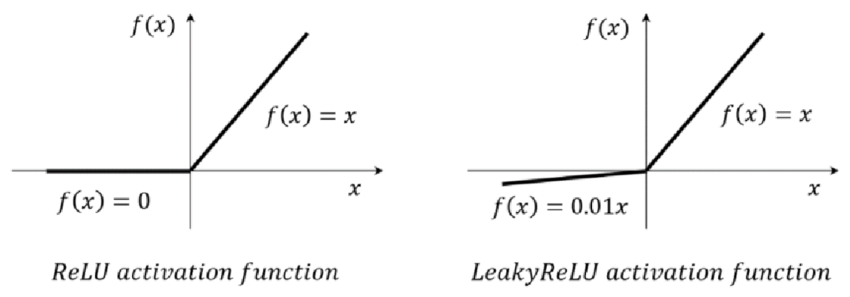

In [ ]:
# input dimension
idim = 300

# hidden dimension
hdim1 = 100

# output dimension
# on a choisit deux neurones
odim = 2

# create an empty model and stack layers one after another
mlp1 = tf.keras.Sequential() # create an empy model
mlp1.add(tf.keras.Input(shape=(idim,),name="input")) # empty dimension for batch size

# LeakyRelu
lRelu = tf.keras.layers.LeakyReLU(
    alpha=0.03
)

mlp1.add(tf.keras.layers.Dense(hdim1, activation=lRelu, name="hidden1"))
mlp1.add(tf.keras.layers.Dropout(0.50)) # drop 50% of the weights

mlp1.add(tf.keras.layers.Dense(odim, activation="softmax", name="output"))
print(f'inputs : {mlp1.inputs}\nlayers : {mlp1.layers}\noutputs : {mlp1.outputs}\noutput shape : {mlp1.output_shape}')

inputs : [<KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'input')>]
layers : [<keras.src.layers.core.dense.Dense object at 0x7d7bbcaa0d30>, <keras.src.layers.regularization.dropout.Dropout object at 0x7d7bbcaa07f0>, <keras.src.layers.core.dense.Dense object at 0x7d7bbcaa1ea0>]
outputs : [<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'output')>]
output shape : (None, 2)


In [ ]:
mlp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               30100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 2)                 202       
                                                                 
Total params: 30302 (118.37 KB)
Trainable params: 30302 (118.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


On a 30302 paramètre

Estimation des paramètres

In [ ]:
# ds_estim is the estimation dataset, ds_valid the validation one
training = mlp1.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
print(training.history.keys())
estim_acc = training.history['accuracy']
valid_acc = training.history['val_accuracy']
estim_loss = training.history['loss']
valid_loss = training.history['val_loss']